<a href="https://colab.research.google.com/github/bartlomiejsiusta/mgu/blob/main/Densenet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras as keras
!pip install foolbox==3.3.1
import foolbox
import eagerpy as ep


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train.astype(np.float32)
x_test.astype(np.float32)
x_train = x_train/255.0
x_test = x_test/255.0


# dzielenie danych treningowych na treningowe i walidacyjne
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]


# one hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
#plt.imshow(x_train[2])


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape, "y_valid shape:", y_valid.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)


170508288/170498071 [==============================] - 10s 0us/step
x_train shape: (45000, 32, 32, 3) y_train shape: (45000, 10)
x_valid shape: (5000, 32, 32, 3) y_valid shape: (5000, 10)
x_test shape: (10000, 32, 32, 3) y_test shape: (10000, 10)


In [3]:
from keras.callbacks import ModelCheckpoint


densenetModel = tf.keras.applications.DenseNet121(weights=None, classes=10, input_shape=(32, 32, 3))
densenetModel.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

densenetCheckpointer = ModelCheckpoint(filepath='densenet_best.hdf5', verbose = 1, save_best_only=True)
densenetModel.fit(x_train, y_train, batch_size=512, epochs=15, verbose=1, validation_data=(x_valid, y_valid), callbacks=[densenetCheckpointer])



Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 1.5429 - accuracy: 0.4414
Epoch 00001: val_loss improved from inf to 2.51545, saving model to densenet_best.hdf5
88/88 [==============================] - 56s 331ms/step - loss: 1.5429 - accuracy: 0.4414 - val_loss: 2.5155 - val_accuracy: 0.1024
Epoch 2/15
88/88 [==============================] - ETA: 0s - loss: 1.1287 - accuracy: 0.5944
Epoch 00002: val_loss did not improve from 2.51545
88/88 [==============================] - 18s 202ms/step - loss: 1.1287 - accuracy: 0.5944 - val_loss: 3.1345 - val_accuracy: 0.1038
Epoch 3/15
88/88 [==============================] - ETA: 0s - loss: 0.9352 - accuracy: 0.6688
Epoch 00003: val_loss did not improve from 2.51545
88/88 [==============================] - 28s 317ms/step - loss: 0.9352 - accuracy: 0.6688 - val_loss: 3.5553 - val_accuracy: 0.1308
Epoch 4/15
88/88 [==============================] - ETA: 0s - loss: 0.7969 - accuracy: 0.7168
Epoch 00004: val_loss did not improve f

clean accuracy:  87.5 %


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

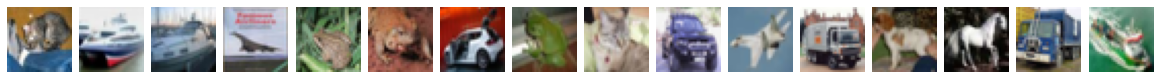

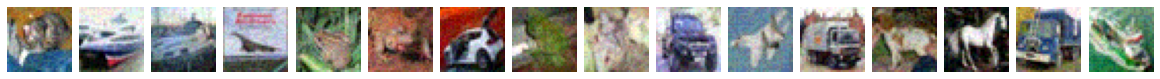

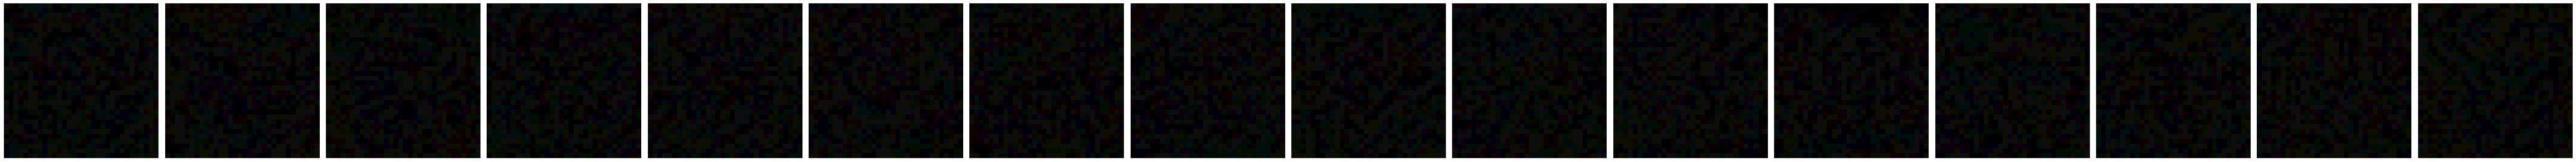

In [9]:
# uzywamy najlepszych wag
densenet_trained_model = tf.keras.models.load_model('densenet_best.hdf5')
d_foolbox_model = foolbox.models.TensorFlowModel(model = densenet_trained_model,bounds = (0.0, 1.0))

# FGSM
attack_fgsm = foolbox.attacks.FGSM()
# CW
attack_cw = foolbox.attacks.L2CarliniWagnerAttack(steps=100)
# ProjectedGradientDescent
attack_pgd = foolbox.attacks.L2ProjectedGradientDescentAttack(steps=100)

epsilons = np.linspace(0.0, 0.1, num=30)



images, labels = foolbox.samples(d_foolbox_model, dataset="cifar10", batchsize=16) # 

# x_test = tf.convert_to_tensor(x_test, dtype=np.float32)
# y_test = tf.convert_to_tensor(y_test, dtype=np.int64)
# new_x_test, new_y_test = ep.astensors(x_test, y_test)

# clean_acc = foolbox.accuracy(d_foolbox_model, images, labels)
# print(f"clean accuracy:  {clean_acc * 100:.1f} %")

# atak jest wykonywany dla kazdego epsilona - 13 wartosci epsilon - wyjscie 13 roznych serii perturbacji kazda po 16 obrazkow

# print(type(images))
# print(type(x_test))
raw_advs, clipped_advs, success = attack_fgsm(d_foolbox_model, images, labels, epsilons=epsilons)


foolbox.plot.images(images)
foolbox.plot.images(clipped_advs[15])
foolbox.plot.images(clipped_advs[15] - images, scale=4)


(30, 16)
[0.875  0.625  0.375  0.25   0.125  0.0625 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


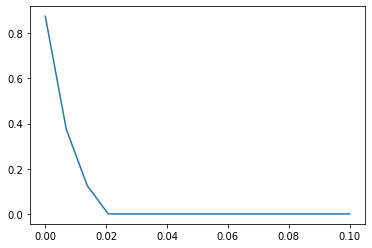

In [10]:

print(success.shape)

success_rate = success.numpy().astype(float).mean(axis=-1)

before_defense = robust_accuracy = 1 - success_rate
print(robust_accuracy)

plt.plot(epsilons, before_defense)


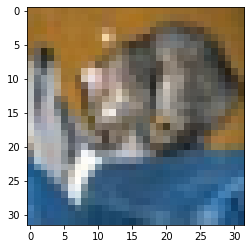

In [11]:
# add noise
from tensorflow.keras.layers import GaussianNoise

sample = GaussianNoise(0.02)
plt.imshow(images[0])
noisey = sample(images,training=True)   



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

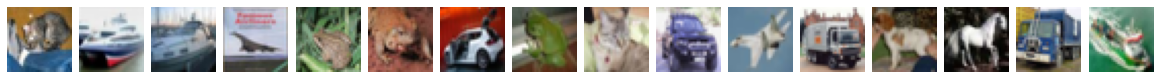

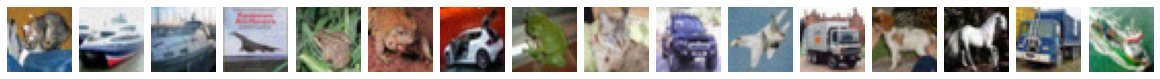

In [12]:
#plt.imshow(noisey[2])
foolbox.plot.images(images)
foolbox.plot.images(noisey)

[0.875 0.625 0.375 0.25  0.125 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]
[0.875  0.625  0.375  0.25   0.125  0.0625 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


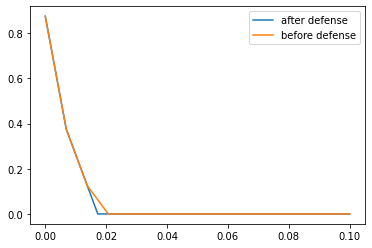

In [16]:
raw_advs, clipped_advs, success = attack_fgsm(d_foolbox_model, noisey, labels, epsilons=epsilons)
success_rate = success.numpy().astype(float).mean(axis=-1)

after_defense = robust_accuracy = 1 - success_rate
print(after_defense)
print(before_defense)
plt.plot(epsilons, after_defense, label="after defense")
plt.plot(epsilons, before_defense, label="before defense")
plt.legend()
plt.show()
